In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
auto_df_raw = pd.read_excel("BEA Auto-Light Truck Sales.xlsx")
light_truck_df_raw = pd.read_excel('BEA Light Truck Sales.xlsx')

In [3]:
auto_df = auto_df_raw.iloc[6:, [0, 1, 4, 8]].copy()
light_truck_df = light_truck_df_raw.iloc[6:, [0, 1, 4, 8]].copy()

# Manually assign meaningful column names
auto_df.columns = ['Month', 'Year', 'Domestic Auto Sales', 'Foreign Auto Sales']
light_truck_df.columns = ['Month', 'Year', 'Domestic Light Truck Sales', 'Foreign Light Truck Sales']

# Drop any rows with missing values that were created by the messy header
auto_df.dropna(subset=['Month', 'Year', 'Domestic Auto Sales', 'Foreign Auto Sales'], inplace=True)
light_truck_df.dropna(subset=['Month', 'Year', 'Domestic Light Truck Sales', 'Foreign Light Truck Sales'], inplace=True)

# Convert sales columns to numeric type
auto_df['Domestic Auto Sales'] = pd.to_numeric(auto_df['Domestic Auto Sales'], errors='coerce')
auto_df['Foreign Auto Sales'] = pd.to_numeric(auto_df['Foreign Auto Sales'], errors='coerce')
light_truck_df['Domestic Light Truck Sales'] = pd.to_numeric(light_truck_df['Domestic Light Truck Sales'], errors='coerce')
light_truck_df['Foreign Light Truck Sales'] = pd.to_numeric(light_truck_df['Foreign Light Truck Sales'], errors='coerce')

# Drop any new NaNs that were created during the numeric conversion
auto_df.dropna(inplace=True)
light_truck_df.dropna(inplace=True)

# Convert 'Year' column to integer to remove the '.0' decimal and prevent DateParseError
auto_df['Year'] = auto_df['Year'].astype(int)
light_truck_df['Year'] = light_truck_df['Year'].astype(int)

# Combine 'Month' and 'Year' into a single 'Date' column and convert to datetime
auto_df['Date'] = pd.to_datetime(auto_df['Month'].astype(str) + ' ' + auto_df['Year'].astype(str))
light_truck_df['Date'] = pd.to_datetime(light_truck_df['Month'].astype(str) + ' ' + light_truck_df['Year'].astype(str))

# Create a new DataFrame with just the relevant sales data
combined_df = pd.DataFrame({
    'Date': auto_df['Date'],
    'Domestic Auto Sales': auto_df['Domestic Auto Sales'],
    'Foreign Auto Sales': auto_df['Foreign Auto Sales'],
    'Domestic Light Truck Sales': light_truck_df['Domestic Light Truck Sales'],
    'Foreign Light Truck Sales': light_truck_df['Foreign Light Truck Sales']
})

# Set the 'Date' as the index for plotting and filter the data
combined_df.set_index('Date', inplace=True)
combined_df = combined_df.loc[combined_df.index.year <= 2015]

print(combined_df.head())

            Domestic Auto Sales  Foreign Auto Sales  \
Date                                                  
1990-03-01                573.7              102.46   
1990-04-01                572.2               96.08   
1990-05-01                557.7              112.31   
1990-06-01                562.3              107.66   
1990-07-01                564.9              105.28   

            Domestic Light Truck Sales  Foreign Light Truck Sales  
Date                                                               
1990-03-01                       338.0                     105.23  
1990-04-01                       334.2                      97.33  
1990-05-01                       326.9                     104.78  
1990-06-01                       328.8                      99.50  
1990-07-01                       341.9                     109.16  


C:\Users\miyee\AppData\Local\Temp\ipykernel_2140\172287095.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  auto_df['Date'] = pd.to_datetime(auto_df['Month'].astype(str) + ' ' + auto_df['Year'].astype(str))
C:\Users\miyee\AppData\Local\Temp\ipykernel_2140\172287095.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  light_truck_df['Date'] = pd.to_datetime(light_truck_df['Month'].astype(str) + ' ' + light_truck_df['Year'].astype(str))


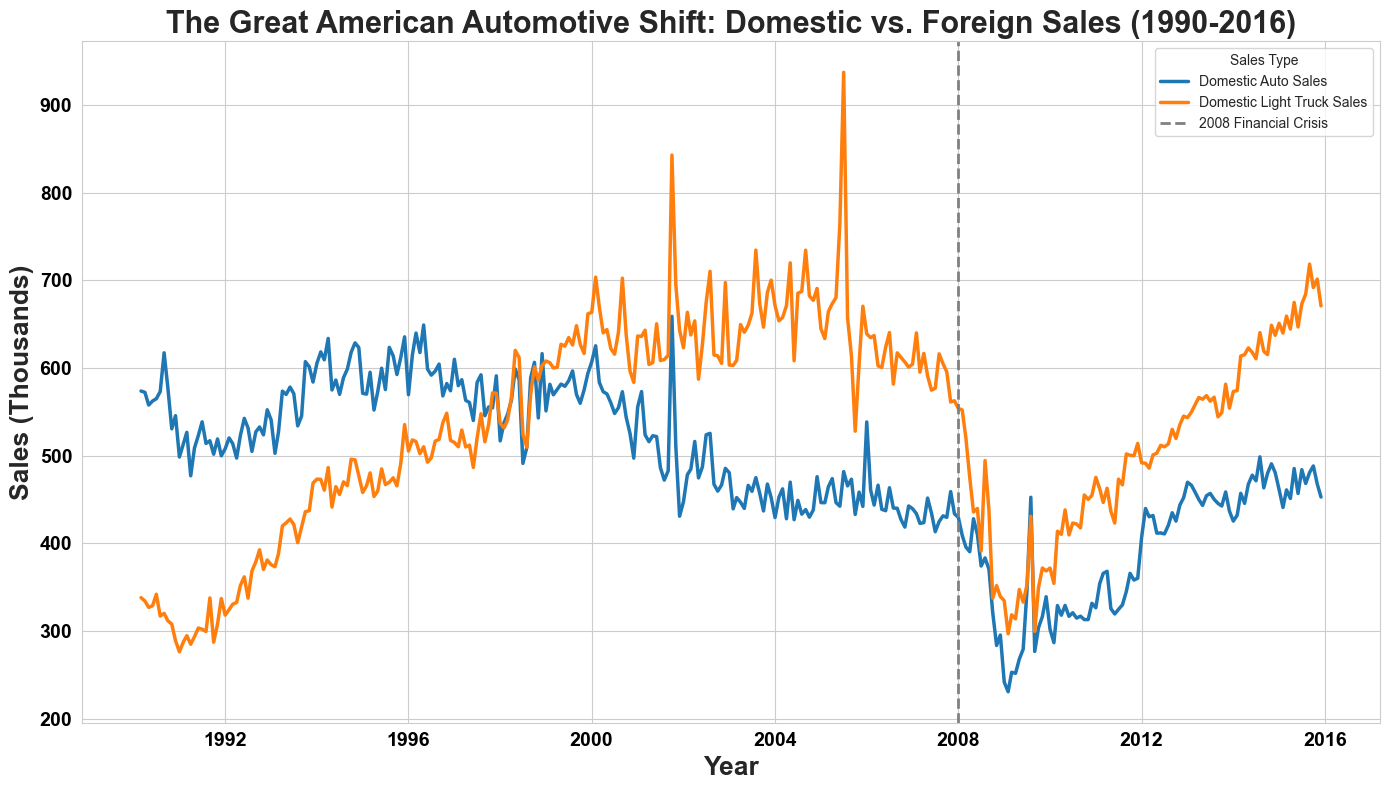


Plot generation complete.


In [4]:
# We'll use a clean, professional style for the NADA leadership team.
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Filter the DataFrame to only include domestic sales before melting
filtered_df = combined_df[['Domestic Auto Sales', 'Domestic Light Truck Sales']]

# The data is "melted" into a long format to allow for easy plotting with seaborn's 'hue'
melted_df = filtered_df.melt(ignore_index=False)
melted_df.index.name = 'Date'
melted_df.columns = ['Vehicle Type', 'Sales']
melted_df = melted_df.reset_index()

ax = sns.lineplot(x='Date', y='Sales', hue='Vehicle Type', data=melted_df, linewidth=2.5, dashes=False)

# Add a vertical line for the 2008 financial crisis
plt.axvline(x=pd.Timestamp('2008-01-01'), color='gray', linestyle='--', linewidth=2, label='2008 Financial Crisis')

# Add annotations to the plot to highlight the narrative
#plt.text(pd.Timestamp('2008-01-01'), 5, 'Financial Crisis Collapse', horizontalalignment='left' #fontsize=12, color='red')

# Set plot titles and labels
plt.title('The Great American Automotive Shift: Domestic vs. Foreign Sales (1990-2016)', fontsize=22, fontweight='bold')
plt.xlabel('Year', fontsize=19, fontweight='bold')
plt.ylabel('Sales (Thousands)', fontsize=19, fontweight='bold') # Changed this label to thousands since that

#ax.tick_params(axis='x', labelsize=16, labelcolor='black', fontweight='bold')
#ax.tick_params(axis='y', labelsize=16, labelcolor='black', fontweight='bold')
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(14)
    label.set_color('black')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(14)
    label.set_color('black')

# is the correct unit
plt.legend(title='Sales Type')
plt.tight_layout()
plt.show()

print("\nPlot generation complete.")

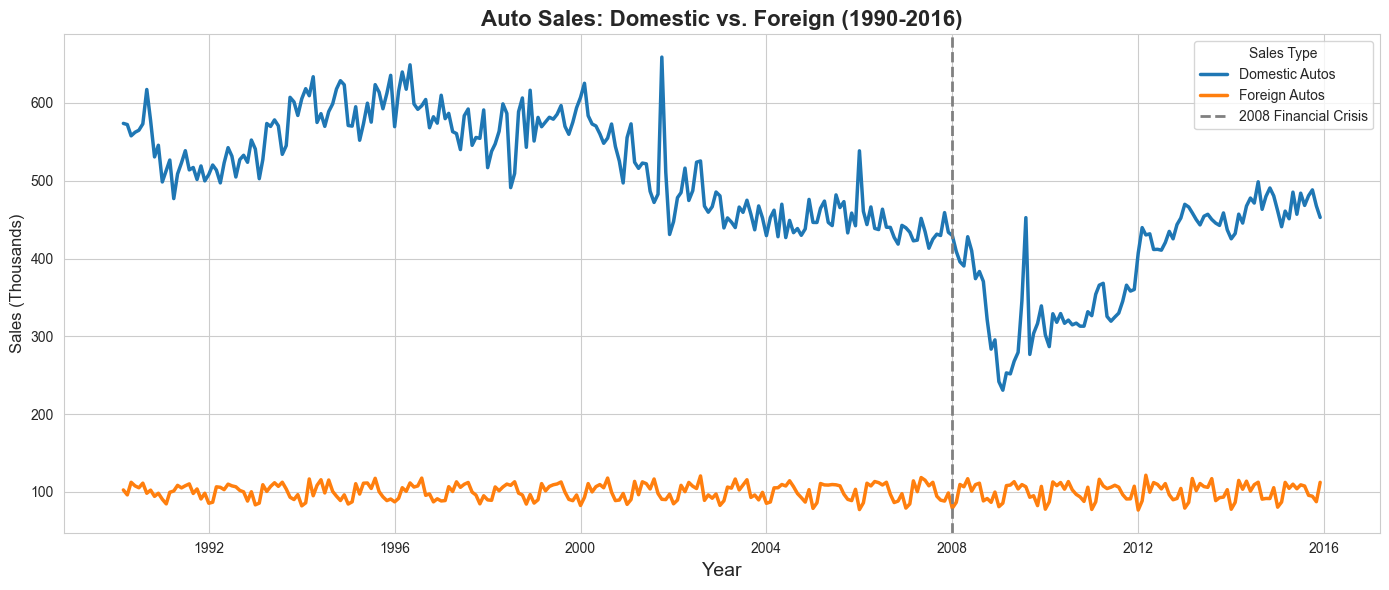

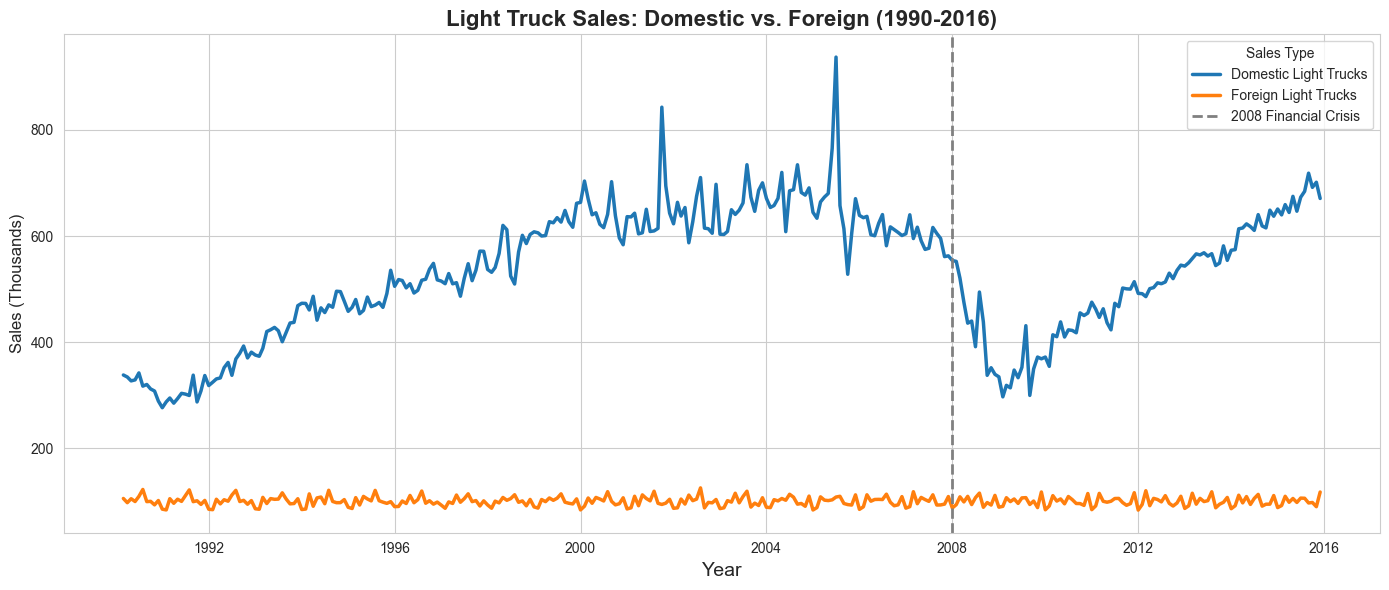

In [5]:
sns.set_style("whitegrid")

# Create a separate figure for Auto Sales
plt.figure(figsize=(14, 6))
sns.lineplot(x=combined_df.index, y='Domestic Auto Sales', data=combined_df, label='Domestic Autos', linewidth=2.5)
sns.lineplot(x=combined_df.index, y='Foreign Auto Sales', data=combined_df, label='Foreign Autos', linewidth=2.5)
plt.axvline(x=pd.Timestamp('2008-01-01'), color='gray', linestyle='--', linewidth=2, label='2008 Financial Crisis')
plt.title('Auto Sales: Domestic vs. Foreign (1990-2016)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales (Thousands)', fontsize=12)
plt.legend(title='Sales Type')
plt.tight_layout()
plt.show()

# Create a separate figure for Light Truck Sales
plt.figure(figsize=(14, 6))
sns.lineplot(x=combined_df.index, y='Domestic Light Truck Sales', data=combined_df, label='Domestic Light Trucks', linewidth=2.5)
sns.lineplot(x=combined_df.index, y='Foreign Light Truck Sales', data=combined_df, label='Foreign Light Trucks', linewidth=2.5)
plt.axvline(x=pd.Timestamp('2008-01-01'), color='gray', linestyle='--', linewidth=2, label='2008 Financial Crisis')
plt.title('Light Truck Sales: Domestic vs. Foreign (1990-2016)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales (Thousands)', fontsize=12)
plt.legend(title='Sales Type')
plt.tight_layout()
plt.show()
